# Tobigs 22기 3주차 정규세션 Ensemble 과제

# 과제1. High variance/bias

개념참조영상 : https://www.youtube.com/watch?v=EuBBz3bI-aA

## Q1. High variance의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ 복잡한 모델을 다룰 경우 학습 데이터에서 생기는 노이즈나 불규칙성도 학습하여 새로운 데이터에 대해 성능이 저하된다. 따라서 train시에는 좋은 성능을 보일지 몰라도 test시의 성능이 제대로 나오지 않는 경우가 발생한다.

## Q2. High bias의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ 너무 단순한 모델을 다룰 시에 문제가 생기며 과도하게 일반화된 예측을 하게 된다.

## Q3. High variance 와 high bias를 다룰때 적합한 ensemble 방식과 그 이유를 적어주세요.

- High variance problem : 🐻‍❄️ 고분산 문제에 사용할 수 있는 앙상블 방식은 Bootstrap aggregating으로 학습 데이터에 과적합되는 상황에서 발생하는 분산을 줄이고 안정적인 예측을 할 수 있도록 도운다.



- High bias problem : 🐻‍❄️ Boosting은 고 편향 문제를 해결하는 데 효과적인 앙상블 기법이다. 이는 너무 단순해서 데이터의 복잡한 패턴을 충분히 학습하지 못할 때 약한 모델을 결합하여 이를 해결한다.

# 과제2. Ensemble 실습

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

### 칼럼 설명
```
[features]
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : 카드 종류 (Blue, Silver, Gold, Platinum)
 - Months_on_book : 은행과의 관계 기간 (개월 수)
 - Total_Relationship_Count : 고객이 보유한 전체 제품 수
 - Months_Inactive_12_mon : 최근 12개월 동안 비활성화된 개월 수
 - Contacts_Count_12_mon : 최근 12개월 동안의 연락 횟수
 - Credit_Limit : 신용 카드의 신용 한도
 - Total_Revolving_Bal : 신용 카드의 총 회전 잔액
 - Avg_Open_To_Buy : 구매 가능 신용 한도 (최근 12개월 평균)
 - Total_Amt_Chng_Q4_Q1 : 거래 금액 변화율 (4분기 대비 1분기)
 - Total_Trans_Amt :  총 거래 금액 (지난 12개월)
 - Total_Trans_Ct : 총 거래 횟수 (지난 12개월)
 - Total_Ct_Chng_Q4_Q1 : 거래 횟수 변화율 (4분기 대비 1분기)
 - Avg_Utilization_Ratio : 평균 카드 이용 비율

[target]
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1

```


In [20]:
import pandas as pd

# 🐻‍❄️데이터의 경로는 변경해주세요
df = pd.read_csv('BankChurners.csv')

# Feature 21 & 22의 경우 데이터 셋에서 삭제하는 것을 추천하는 문구 발견, 삭제
print(len(df.columns))
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # inplace = True 데이터 원본에서 처리 not copy
print(len(df.columns))

23
21


In [21]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA & Preprocessing

EDA를 통해 인사이트를 얻고 전처리를 진행해주세요.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = df.dropna()


In [33]:
df = df.drop_duplicates()

# 문자열로 구성된 열(column) 삭제하는 코드
df_cleaned = df.drop(df.select_dtypes(include=['object']).columns, axis=1)

# 결과 확인
print(df_cleaned.head())

   CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0  768805383            45                3              39   
1  818770008            49                5              44   
2  713982108            51                3              36   
3  769911858            40                4              34   
4  709106358            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.3

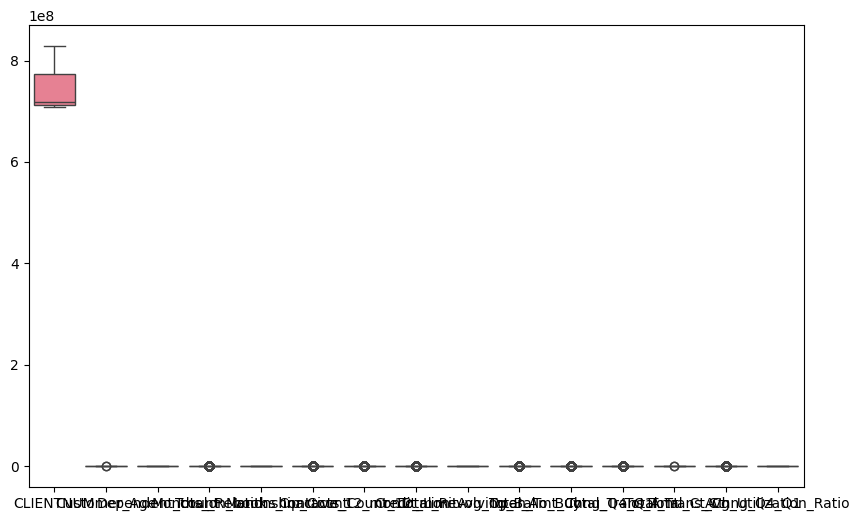

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [34]:
# 박스플롯을 통한 이상치 탐지
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

# 이상치 제거 (IQR 방식을 활용)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 *IQR))).any(axis=1)]

In [37]:
df_encoded = pd.get_dummies(df)

## Modeling

다음 4가지 모델의 성능을 비교해주세요.
- Decision Tree
- Random Forest
- Adaboost
- Gradientboosting
- 이외 다른 ensemble 모델을 사용하셔도 됩니다!


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# 타깃 변수와 독립 변수 설정
X = df_encoded.drop('Customer_Age', axis=1)
y = df_encoded['Months_on_book']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# 결정 트리 모델
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 1.0


In [40]:
# 랜덤 포레스트 모델
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.7428430404738401


In [41]:
# AdaBoost 모델
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred_ada = adaboost.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.45360315893385983


In [43]:
# Gradient Boosting 모델
gradient_boost = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boost.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred_gb = gradient_boost.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

Gradient Boosting Accuracy: 1.0


In [44]:
print("Model Performance Comparison:")
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"AdaBoost Accuracy: {accuracy_ada}")
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

Model Performance Comparison:
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 0.7428430404738401
AdaBoost Accuracy: 0.45360315893385983
Gradient Boosting Accuracy: 1.0
